# BCAUSS

__Reference__: [Gino Tesei et al, Learning end-to-end patient representations through self-supervised covariate balancing for causal treatment effect estimation, Journal of Biomedical Informatics 2023](https://www.sciencedirect.com/science/article/pii/S1532046423000606/pdfft?md5=923768a5e1b27765e9da9ac13c0477aa&pid=1-s2.0-S1532046423000606-main.pdf)

## BCAUSS on IHDP 

In [1]:
from causalforge.model import Model , PROBLEM_TYPE
from causalforge.data_loader import DataLoader 

# load IHDP dataset 
r = DataLoader.get_loader('IHDP').load()
X_tr, T_tr, YF_tr, YCF_tr, mu_0_tr, mu_1_tr, X_te, T_te, YF_te, YCF_te, mu_0_te, mu_1_te = r

# model 
params={}
params['input_dim'] = X_tr.shape[1] 
    
    
bcauss = Model.create_model("bcauss",
                               params,
                               problem_type=PROBLEM_TYPE.CAUSAL_TREATMENT_EFFECT_ESTIMATION, 
                               multiple_treatments=False)

bcauss.model.summary()

2023-05-11 13:33:03.330354: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 13:33:08.317957: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 25)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 200)          5200        ['input[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 200)          40200       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 200)          40200       ['dense_1[0][0]']                
                                                                                              

 tf.concat_1 (TFOpLambda)       (None, 25)           0           ['tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
                                                                  'tf.split_1[0][0]',             
          

 )                                                                'tf.math.square_1[0][0]']       
                                                                                                  
 tf.math.squared_difference (TF  (25,)               0           ['tf.convert_to_tensor_2[0][0]', 
 OpLambda)                                                        'tf.cast[0][0]']                
                                                                                                  
 tf.math.reduce_sum_1 (TFOpLamb  ()                  0           ['tf.math.multiply[0][0]']       
 da)                                                                                              
                                                                                                  
 tf.math.reduce_sum_2 (TFOpLamb  ()                  0           ['tf.math.multiply_1[0][0]']     
 da)                                                                                              
          

In [2]:
from causalforge.metrics import eps_ATE_diff, PEHE_with_ite
import numpy as np

experiment_ids = [1,10,400]

eps_ATE_tr, eps_ATE_te = [], []
eps_PEHE_tr, eps_PEHE_te = [] , [] 



for idx in experiment_ids:    
    t_tr, y_tr, x_tr, mu0tr, mu1tr = T_tr[:,idx] , YF_tr[:,idx], X_tr[:,:,idx], mu_0_tr[:,idx], mu_1_tr[:,idx] 
    t_te, y_te, x_te, mu0te, mu1te = T_te[:,idx] , YF_te[:,idx], X_te[:,:,idx], mu_0_te[:,idx], mu_1_te[:,idx]  
    
    
    # Train your causal method on train-set ...
    bcauss.fit(x_tr,t_tr,y_tr)

    # Validate your method test-set ... 
    ATE_truth_tr = (mu1tr - mu0tr).mean()
    ATE_truth_te = (mu1te - mu0te).mean()
    
    ITE_truth_tr = (mu1tr - mu0tr)
    ITE_truth_te = (mu1te - mu0te)
    
    eps_ATE_tr.append( eps_ATE_diff( bcauss.predict_ite(x_tr), ITE_truth_tr) )
    eps_ATE_te.append( eps_ATE_diff( bcauss.predict_ite(x_te), ITE_truth_te) )
    
    eps_PEHE_tr.append( PEHE_with_ite( bcauss.predict_ite(x_tr), ITE_truth_tr, sqrt=True))
    eps_PEHE_te.append( PEHE_with_ite( bcauss.predict_ite(x_te), ITE_truth_te , sqrt=True))
        

Epoch 1/500


/Users/AG62216/opt/anaconda3/envs/causalforge/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 1s 1s/step - loss: 517.7014 - val_loss: 144.4549 - lr: 1.0000e-05
Epoch 2/500
1/1 [==============================] - 0s 42ms/step - loss: 508.5542 - val_loss: 140.8178 - lr: 1.0000e-05
Epoch 3/500
1/1 [==============================] - 0s 41ms/step - loss: 495.8989 - val_loss: 136.4531 - lr: 1.0000e-05
Epoch 4/500
1/1 [==============================] - 0s 40ms/step - loss: 480.6061 - val_loss: 131.5586 - lr: 1.0000e-05
Epoch 5/500
1/1 [==============================] - 0s 42ms/step - loss: 463.6482 - val_loss: 126.4094 - lr: 1.0000e-05
Epoch 6/500
1/1 [==============================] - 0s 39ms/step - loss: 445.8311 - val_loss: 121.1316 - lr: 1.0000e-05
Epoch 7/500
1/1 [==============================] - 0s 40ms/step - loss: 427.5510 - val_loss: 115.8782 - lr: 1.0000e-05
Epoch 8/500
1/1 [==============================] - 0s 40ms/step - loss: 409.3498 - val_loss: 110.7323 - lr: 1.0000e-05
Epoch 9/500
1/1 [==============================] - 0s 41ms/ste

Epoch 67/500
1/1 [==============================] - 0s 33ms/step - loss: 178.0646 - val_loss: 46.6497 - lr: 1.0000e-05
Epoch 68/500
1/1 [==============================] - 0s 33ms/step - loss: 177.2871 - val_loss: 46.4130 - lr: 1.0000e-05
Epoch 69/500
1/1 [==============================] - 0s 34ms/step - loss: 176.5219 - val_loss: 46.1841 - lr: 1.0000e-05
Epoch 70/500
1/1 [==============================] - 0s 34ms/step - loss: 175.7719 - val_loss: 45.9674 - lr: 1.0000e-05
Epoch 71/500
1/1 [==============================] - 0s 42ms/step - loss: 175.0379 - val_loss: 45.7603 - lr: 1.0000e-05
Epoch 72/500
1/1 [==============================] - 0s 41ms/step - loss: 174.3144 - val_loss: 45.5620 - lr: 1.0000e-05
Epoch 73/500
1/1 [==============================] - 0s 34ms/step - loss: 173.5995 - val_loss: 45.3723 - lr: 1.0000e-05
Epoch 74/500
1/1 [==============================] - 0s 35ms/step - loss: 172.8931 - val_loss: 45.1907 - lr: 1.0000e-05
Epoch 75/500
1/1 [==============================

1/1 [==============================] - 0s 36ms/step - loss: 137.7097 - val_loss: 38.8845 - lr: 1.0000e-05
Epoch 136/500
1/1 [==============================] - 0s 35ms/step - loss: 137.2841 - val_loss: 38.8254 - lr: 1.0000e-05
Epoch 137/500
1/1 [==============================] - 0s 35ms/step - loss: 136.8656 - val_loss: 38.7674 - lr: 1.0000e-05
Epoch 138/500
1/1 [==============================] - 0s 34ms/step - loss: 136.4555 - val_loss: 38.7112 - lr: 1.0000e-05
Epoch 139/500
1/1 [==============================] - 0s 34ms/step - loss: 136.0539 - val_loss: 38.6574 - lr: 1.0000e-05
Epoch 140/500
1/1 [==============================] - 0s 33ms/step - loss: 135.6600 - val_loss: 38.6063 - lr: 1.0000e-05
Epoch 141/500
1/1 [==============================] - 0s 35ms/step - loss: 135.2741 - val_loss: 38.5582 - lr: 1.0000e-05
Epoch 142/500
1/1 [==============================] - 0s 34ms/step - loss: 134.8953 - val_loss: 38.5116 - lr: 1.0000e-05
Epoch 143/500
1/1 [==============================] - 0

1/1 [==============================] - 0s 32ms/step - loss: 119.6681 - val_loss: 38.2475 - lr: 1.0000e-05
Epoch 204/500
1/1 [==============================] - 0s 31ms/step - loss: 119.4790 - val_loss: 38.2671 - lr: 1.0000e-05
Epoch 205/500
1/1 [==============================] - 0s 31ms/step - loss: 119.2904 - val_loss: 38.2869 - lr: 1.0000e-05
Epoch 206/500
1/1 [==============================] - 0s 36ms/step - loss: 119.1020 - val_loss: 38.3072 - lr: 1.0000e-05
Epoch 207/500
1/1 [==============================] - 0s 33ms/step - loss: 118.9147 - val_loss: 38.3277 - lr: 1.0000e-05
Epoch 208/500
1/1 [==============================] - 0s 33ms/step - loss: 118.7284 - val_loss: 38.3495 - lr: 1.0000e-05
Epoch 209/500
1/1 [==============================] - 0s 34ms/step - loss: 118.5434 - val_loss: 38.3711 - lr: 1.0000e-05
Epoch 210/500
1/1 [==============================] - 0s 34ms/step - loss: 118.3595 - val_loss: 38.3930 - lr: 1.0000e-05
Epoch 211/500
1/1 [==============================] - 0

/Users/AG62216/opt/anaconda3/envs/causalforge/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 1s 968ms/step - loss: 521.3827 - val_loss: 103.2478 - lr: 1.0000e-05
Epoch 2/500
1/1 [==============================] - 0s 38ms/step - loss: 494.2205 - val_loss: 97.7614 - lr: 1.0000e-05
Epoch 3/500
1/1 [==============================] - 0s 38ms/step - loss: 464.9322 - val_loss: 93.1858 - lr: 1.0000e-05
Epoch 4/500
1/1 [==============================] - 0s 39ms/step - loss: 436.4611 - val_loss: 88.9230 - lr: 1.0000e-05
Epoch 5/500
1/1 [==============================] - 0s 35ms/step - loss: 408.5058 - val_loss: 84.5354 - lr: 1.0000e-05
Epoch 6/500
1/1 [==============================] - 0s 36ms/step - loss: 380.5995 - val_loss: 79.9090 - lr: 1.0000e-05
Epoch 7/500
1/1 [==============================] - 0s 35ms/step - loss: 353.4217 - val_loss: 75.2530 - lr: 1.0000e-05
Epoch 8/500
1/1 [==============================] - 0s 34ms/step - loss: 328.1276 - val_loss: 70.9067 - lr: 1.0000e-05
Epoch 9/500
1/1 [==============================] - 0s 37ms/step - 

Epoch 67/500
1/1 [==============================] - 0s 36ms/step - loss: 75.0882 - val_loss: 26.8330 - lr: 1.0000e-05
Epoch 68/500
1/1 [==============================] - 0s 36ms/step - loss: 74.2354 - val_loss: 26.6771 - lr: 1.0000e-05
Epoch 69/500
1/1 [==============================] - 0s 35ms/step - loss: 73.4194 - val_loss: 26.5268 - lr: 1.0000e-05
Epoch 70/500
1/1 [==============================] - 0s 36ms/step - loss: 72.6473 - val_loss: 26.3906 - lr: 1.0000e-05
Epoch 71/500
1/1 [==============================] - 0s 36ms/step - loss: 71.9208 - val_loss: 26.2640 - lr: 1.0000e-05
Epoch 72/500
1/1 [==============================] - 0s 38ms/step - loss: 71.2301 - val_loss: 26.1360 - lr: 1.0000e-05
Epoch 73/500
1/1 [==============================] - 0s 38ms/step - loss: 70.5683 - val_loss: 26.0088 - lr: 1.0000e-05
Epoch 74/500
1/1 [==============================] - 0s 40ms/step - loss: 69.9286 - val_loss: 25.8798 - lr: 1.0000e-05
Epoch 75/500
1/1 [==============================] - 0s 4

1/1 [==============================] - 0s 36ms/step - loss: 52.5523 - val_loss: 22.7213 - lr: 1.0000e-05
Epoch 137/500
1/1 [==============================] - 0s 37ms/step - loss: 52.4189 - val_loss: 22.7010 - lr: 1.0000e-05
Epoch 138/500
1/1 [==============================] - 0s 36ms/step - loss: 52.2882 - val_loss: 22.6798 - lr: 1.0000e-05
Epoch 139/500
1/1 [==============================] - 0s 36ms/step - loss: 52.1594 - val_loss: 22.6597 - lr: 1.0000e-05
Epoch 140/500
1/1 [==============================] - 0s 34ms/step - loss: 52.0317 - val_loss: 22.6403 - lr: 1.0000e-05
Epoch 141/500
1/1 [==============================] - 0s 35ms/step - loss: 51.9058 - val_loss: 22.6193 - lr: 1.0000e-05
Epoch 142/500
1/1 [==============================] - 0s 34ms/step - loss: 51.7814 - val_loss: 22.6046 - lr: 1.0000e-05
Epoch 143/500
1/1 [==============================] - 0s 36ms/step - loss: 51.6591 - val_loss: 22.5864 - lr: 1.0000e-05
Epoch 144/500
1/1 [==============================] - 0s 34ms/s

Epoch 205/500
1/1 [==============================] - 0s 33ms/step - loss: 45.7626 - val_loss: 22.1645 - lr: 1.0000e-05
Epoch 206/500
1/1 [==============================] - 0s 36ms/step - loss: 45.6858 - val_loss: 22.1698 - lr: 1.0000e-05
Epoch 207/500
1/1 [==============================] - 0s 37ms/step - loss: 45.6094 - val_loss: 22.1627 - lr: 1.0000e-05
Epoch 208/500
1/1 [==============================] - 0s 40ms/step - loss: 45.5330 - val_loss: 22.1656 - lr: 1.0000e-05
Epoch 209/500
1/1 [==============================] - 0s 40ms/step - loss: 45.4573 - val_loss: 22.1611 - lr: 1.0000e-05
Epoch 210/500
1/1 [==============================] - 0s 35ms/step - loss: 45.3822 - val_loss: 22.1636 - lr: 1.0000e-05
Epoch 211/500
1/1 [==============================] - 0s 39ms/step - loss: 45.3076 - val_loss: 22.1612 - lr: 1.0000e-05
Epoch 212/500
1/1 [==============================] - 0s 36ms/step - loss: 45.2336 - val_loss: 22.1645 - lr: 1.0000e-05
Epoch 213/500
1/1 [=============================

/Users/AG62216/opt/anaconda3/envs/causalforge/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 1s 854ms/step - loss: 685.3968 - val_loss: 198.6543 - lr: 1.0000e-05
Epoch 2/500
1/1 [==============================] - 0s 37ms/step - loss: 551.5418 - val_loss: 169.1806 - lr: 1.0000e-05
Epoch 3/500
1/1 [==============================] - 0s 39ms/step - loss: 450.7520 - val_loss: 145.3970 - lr: 1.0000e-05
Epoch 4/500
1/1 [==============================] - 0s 36ms/step - loss: 375.4344 - val_loss: 129.9072 - lr: 1.0000e-05
Epoch 5/500
1/1 [==============================] - 0s 39ms/step - loss: 327.4083 - val_loss: 118.9790 - lr: 1.0000e-05
Epoch 6/500
1/1 [==============================] - 0s 36ms/step - loss: 292.7494 - val_loss: 110.0904 - lr: 1.0000e-05
Epoch 7/500
1/1 [==============================] - 0s 37ms/step - loss: 263.3733 - val_loss: 102.4524 - lr: 1.0000e-05
Epoch 8/500
1/1 [==============================] - 0s 41ms/step - loss: 237.4683 - val_loss: 95.8230 - lr: 1.0000e-05
Epoch 9/500
1/1 [==============================] - 0s 39ms/s

1/1 [==============================] - 0s 32ms/step - loss: 27.9320 - val_loss: 20.8921 - lr: 1.0000e-05
Epoch 68/500
1/1 [==============================] - 0s 35ms/step - loss: 27.5993 - val_loss: 20.7632 - lr: 1.0000e-05
Epoch 69/500
1/1 [==============================] - 0s 37ms/step - loss: 27.2893 - val_loss: 20.6451 - lr: 1.0000e-05
Epoch 70/500
1/1 [==============================] - 0s 38ms/step - loss: 26.9979 - val_loss: 20.5367 - lr: 1.0000e-05
Epoch 71/500
1/1 [==============================] - 0s 40ms/step - loss: 26.7231 - val_loss: 20.4398 - lr: 1.0000e-05
Epoch 72/500
1/1 [==============================] - 0s 36ms/step - loss: 26.4612 - val_loss: 20.3508 - lr: 1.0000e-05
Epoch 73/500
1/1 [==============================] - 0s 41ms/step - loss: 26.2133 - val_loss: 20.2703 - lr: 1.0000e-05
Epoch 74/500
1/1 [==============================] - 0s 36ms/step - loss: 25.9773 - val_loss: 20.1944 - lr: 1.0000e-05
Epoch 75/500
1/1 [==============================] - 0s 38ms/step - lo

1/1 [==============================] - 0s 45ms/step - loss: 19.9727 - val_loss: 17.9031 - lr: 1.0000e-05
Epoch 137/500
1/1 [==============================] - 0s 38ms/step - loss: 19.9284 - val_loss: 17.8885 - lr: 1.0000e-05
Epoch 138/500
1/1 [==============================] - 0s 40ms/step - loss: 19.8848 - val_loss: 17.8744 - lr: 1.0000e-05
Epoch 139/500
1/1 [==============================] - 0s 40ms/step - loss: 19.8418 - val_loss: 17.8600 - lr: 1.0000e-05
Epoch 140/500
1/1 [==============================] - 0s 39ms/step - loss: 19.7996 - val_loss: 17.8458 - lr: 1.0000e-05
Epoch 141/500
1/1 [==============================] - 0s 43ms/step - loss: 19.7581 - val_loss: 17.8316 - lr: 1.0000e-05
Epoch 142/500
1/1 [==============================] - 0s 36ms/step - loss: 19.7173 - val_loss: 17.8176 - lr: 1.0000e-05
Epoch 143/500
1/1 [==============================] - 0s 39ms/step - loss: 19.6773 - val_loss: 17.8038 - lr: 1.0000e-05
Epoch 144/500
1/1 [==============================] - 0s 41ms/s

Epoch 205/500
1/1 [==============================] - 0s 43ms/step - loss: 17.8121 - val_loss: 17.1871 - lr: 1.0000e-05
Epoch 206/500
1/1 [==============================] - 0s 41ms/step - loss: 17.7889 - val_loss: 17.1793 - lr: 1.0000e-05
Epoch 207/500
1/1 [==============================] - 0s 42ms/step - loss: 17.7661 - val_loss: 17.1711 - lr: 1.0000e-05
Epoch 208/500
1/1 [==============================] - 0s 46ms/step - loss: 17.7434 - val_loss: 17.1638 - lr: 1.0000e-05
Epoch 209/500
1/1 [==============================] - 0s 43ms/step - loss: 17.7209 - val_loss: 17.1561 - lr: 1.0000e-05
Epoch 210/500
1/1 [==============================] - 0s 42ms/step - loss: 17.6983 - val_loss: 17.1493 - lr: 1.0000e-05
Epoch 211/500
1/1 [==============================] - 0s 41ms/step - loss: 17.6760 - val_loss: 17.1422 - lr: 1.0000e-05
Epoch 212/500
1/1 [==============================] - 0s 47ms/step - loss: 17.6536 - val_loss: 17.1358 - lr: 1.0000e-05
Epoch 213/500
1/1 [=============================

Epoch 274/500
1/1 [==============================] - 0s 39ms/step - loss: 16.5054 - val_loss: 16.7893 - lr: 1.0000e-05
Epoch 275/500
1/1 [==============================] - 0s 44ms/step - loss: 16.4898 - val_loss: 16.7852 - lr: 1.0000e-05
Epoch 276/500
1/1 [==============================] - 0s 42ms/step - loss: 16.4742 - val_loss: 16.7805 - lr: 1.0000e-05
Epoch 277/500
1/1 [==============================] - 0s 48ms/step - loss: 16.4587 - val_loss: 16.7762 - lr: 1.0000e-05
Epoch 278/500
1/1 [==============================] - 0s 37ms/step - loss: 16.4433 - val_loss: 16.7715 - lr: 1.0000e-05
Epoch 279/500
1/1 [==============================] - 0s 41ms/step - loss: 16.4279 - val_loss: 16.7673 - lr: 1.0000e-05
Epoch 280/500
1/1 [==============================] - 0s 47ms/step - loss: 16.4126 - val_loss: 16.7626 - lr: 1.0000e-05
Epoch 281/500
1/1 [==============================] - 0s 47ms/step - loss: 16.3974 - val_loss: 16.7589 - lr: 1.0000e-05
Epoch 282/500
1/1 [=============================

Epoch 343/500
1/1 [==============================] - 0s 40ms/step - loss: 15.5543 - val_loss: 16.5302 - lr: 1.0000e-05
Epoch 344/500
1/1 [==============================] - 0s 37ms/step - loss: 15.5421 - val_loss: 16.5263 - lr: 1.0000e-05
Epoch 345/500
1/1 [==============================] - 0s 41ms/step - loss: 15.5301 - val_loss: 16.5243 - lr: 1.0000e-05
Epoch 346/500
1/1 [==============================] - 0s 35ms/step - loss: 15.5180 - val_loss: 16.5201 - lr: 1.0000e-05
Epoch 347/500
1/1 [==============================] - 0s 41ms/step - loss: 15.5060 - val_loss: 16.5182 - lr: 1.0000e-05
Epoch 348/500
1/1 [==============================] - 0s 39ms/step - loss: 15.4940 - val_loss: 16.5140 - lr: 1.0000e-05
Epoch 349/500
1/1 [==============================] - 0s 41ms/step - loss: 15.4820 - val_loss: 16.5113 - lr: 1.0000e-05
Epoch 350/500
1/1 [==============================] - 0s 40ms/step - loss: 15.4700 - val_loss: 16.5077 - lr: 1.0000e-05
Epoch 351/500
1/1 [=============================

Epoch 412/500
1/1 [==============================] - 0s 39ms/step - loss: 14.7976 - val_loss: 16.3532 - lr: 1.0000e-05
Epoch 413/500
1/1 [==============================] - 0s 45ms/step - loss: 14.7878 - val_loss: 16.3520 - lr: 1.0000e-05
Epoch 414/500
1/1 [==============================] - 0s 40ms/step - loss: 14.7779 - val_loss: 16.3487 - lr: 1.0000e-05
Epoch 415/500
1/1 [==============================] - 0s 38ms/step - loss: 14.7682 - val_loss: 16.3473 - lr: 1.0000e-05
Epoch 416/500
1/1 [==============================] - 0s 41ms/step - loss: 14.7584 - val_loss: 16.3442 - lr: 1.0000e-05
Epoch 417/500
1/1 [==============================] - 0s 46ms/step - loss: 14.7486 - val_loss: 16.3431 - lr: 1.0000e-05
Epoch 418/500
1/1 [==============================] - 0s 40ms/step - loss: 14.7390 - val_loss: 16.3395 - lr: 1.0000e-05
Epoch 419/500
1/1 [==============================] - 0s 41ms/step - loss: 14.7293 - val_loss: 16.3386 - lr: 1.0000e-05
Epoch 420/500
1/1 [=============================

Epoch 481/500
1/1 [==============================] - 0s 44ms/step - loss: 14.1737 - val_loss: 16.2205 - lr: 1.0000e-05
Epoch 482/500
1/1 [==============================] - 0s 43ms/step - loss: 14.1654 - val_loss: 16.2177 - lr: 1.0000e-05
Epoch 483/500
1/1 [==============================] - 0s 42ms/step - loss: 14.1570 - val_loss: 16.2169 - lr: 1.0000e-05
Epoch 484/500
1/1 [==============================] - 0s 42ms/step - loss: 14.1487 - val_loss: 16.2142 - lr: 1.0000e-05
Epoch 485/500
1/1 [==============================] - 0s 45ms/step - loss: 14.1403 - val_loss: 16.2129 - lr: 1.0000e-05
Epoch 486/500
1/1 [==============================] - 0s 43ms/step - loss: 14.1320 - val_loss: 16.2102 - lr: 1.0000e-05
Epoch 487/500
1/1 [==============================] - 0s 47ms/step - loss: 14.1237 - val_loss: 16.2093 - lr: 1.0000e-05
Epoch 488/500
1/1 [==============================] - 0s 40ms/step - loss: 14.1155 - val_loss: 16.2065 - lr: 1.0000e-05
Epoch 489/500
1/1 [=============================

## Results 

In [3]:
import pandas as pd 

pd.DataFrame([[np.mean(eps_ATE_tr),np.mean(eps_ATE_te),np.mean(eps_PEHE_tr),np.mean(eps_PEHE_te)]],
             columns=['eps_ATE_tr','eps_ATE_te','eps_PEHE_tr','eps_PEHE_te'], 
             index=['BCAUSS'])

,eps_ATE_tr,eps_ATE_te,eps_PEHE_tr,eps_PEHE_te
BCAUSS,0.051965,0.067349,0.561242,0.529163


## ITE distribution: learned vs. ground truth 

### Learned 

3/3 [==============================] - 0s 2ms/step


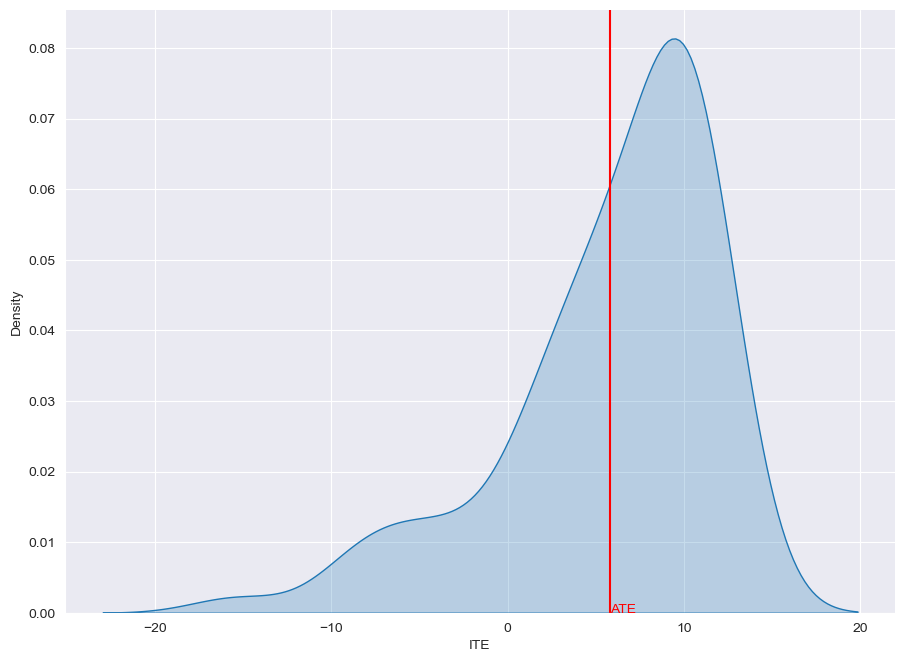

In [4]:
from causalforge.utils import plot_ite_distribution

plot_ite_distribution(bcauss.predict_ite(x_te))

### Ground Truth 

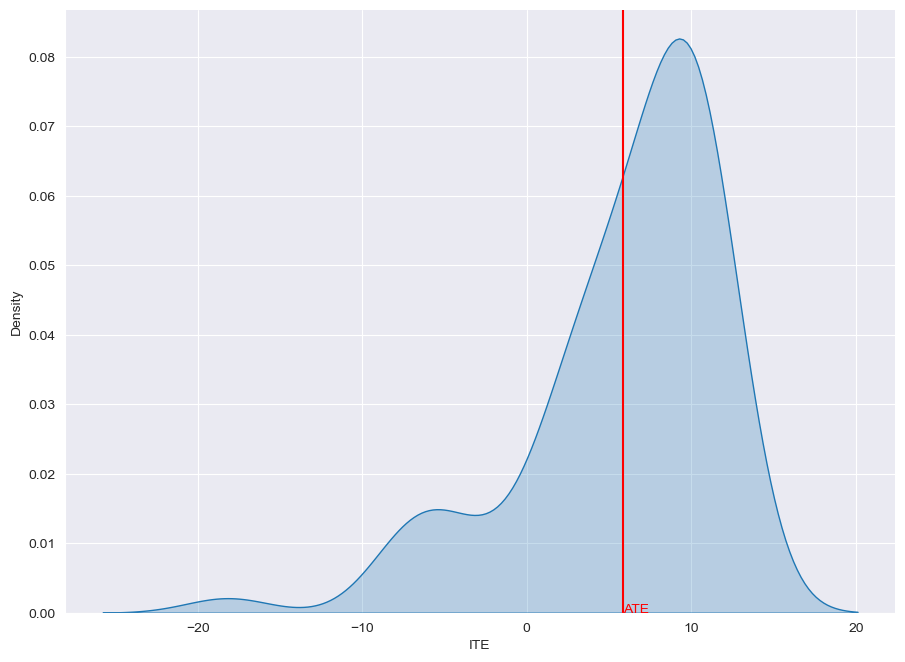

In [5]:
from causalforge.utils import plot_ite_distribution

plot_ite_distribution(ITE_truth_te)